# Prepare for monomer predictions of predicted dimers, then collect predictions

In [1]:
# %load_ext lab_black
# Python standard library
from glob import glob, iglob
import os
import socket
import sys

# 3rd party library imports
import matplotlib.pyplot as plt
import pandas as pd
import pyrosetta
import numpy as np
import scipy
import seaborn as sns
from tqdm.auto import tqdm  # jupyter compatible progress bar
sys.path.insert(0, '/home/broerman/projects/crispy_shifty/')


tqdm.pandas()  # link tqdm to pandas
# Notebook magic
# save plots in the notebook
%matplotlib inline
# reloads modules automatically before executing cells
%load_ext autoreload
%autoreload 2
print(f"running in directory: {os.getcwd()}")  # where are we?
print(f"running on node: {socket.gethostname()}")  # what node are we on?

running in directory: /home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers
running on node: sofia


#### First look at predictions of MSD designs starting from af2 models ####


In [2]:
scores_df = pd.read_csv(
    '06_alphafold_two_state/05_run_4_af2/af2_complex_prediction_runs_combined.sc',
    sep=' ',
    index_col='description',
    usecols=list(range(1,12)))
scores_df

,pae_binder,pae_interaction,pae_interaction1,pae_interaction2,pae_target,plddt_binder,plddt_target,plddt_total,rmsd,time
description,,,,,,,,,,
1a2dcdc9a50fa83cc2fe3daa0e171c14c2c81dcac5b01740_af2pred,6.589,26.916,27.015,26.816,5.425,86.578,87.918,87.248,8.142,242.778
7b3d2684a45d76a27b3f909fba9e837b688bd881314eadd9_af2pred,4.377,26.954,26.959,26.950,4.386,90.246,90.290,90.268,23.019,44.565
6ce67e338170c0381de0e3fc42475af88fc67d4c6edb61eb_af2pred,3.486,27.125,26.823,27.428,6.304,93.780,86.434,90.107,20.888,247.491
5fa884bf3a0a2be97ce3a6cb16bab5f5374505f5ec7a379c_af2pred,3.046,26.904,26.206,27.602,9.381,95.477,84.102,89.790,19.564,243.633
3776835b977265259dcf253ca4f583e2bcdfb55801d676d2_af2pred,3.363,27.081,26.888,27.273,3.908,93.937,91.948,92.942,10.985,43.377
...,...,...,...,...,...,...,...,...,...,...
e151623cc0d925199933ee8423aa16b48afad9b9b723d086_af2pred,3.349,27.084,26.905,27.263,4.787,94.862,90.203,92.533,21.238,61.387
ff04a3fe996e11bfcf7eb9d68876bee717eb3e075eb4fef0_af2pred,3.166,26.662,26.416,26.908,4.843,95.491,91.426,93.458,9.264,61.269
704480bc666e0b895f6607c0db835bfd254128738b32a531_af2pred,3.446,25.780,25.673,25.888,4.185,94.340,92.041,93.190,8.204,61.301


5it [00:00,  9.76it/s]


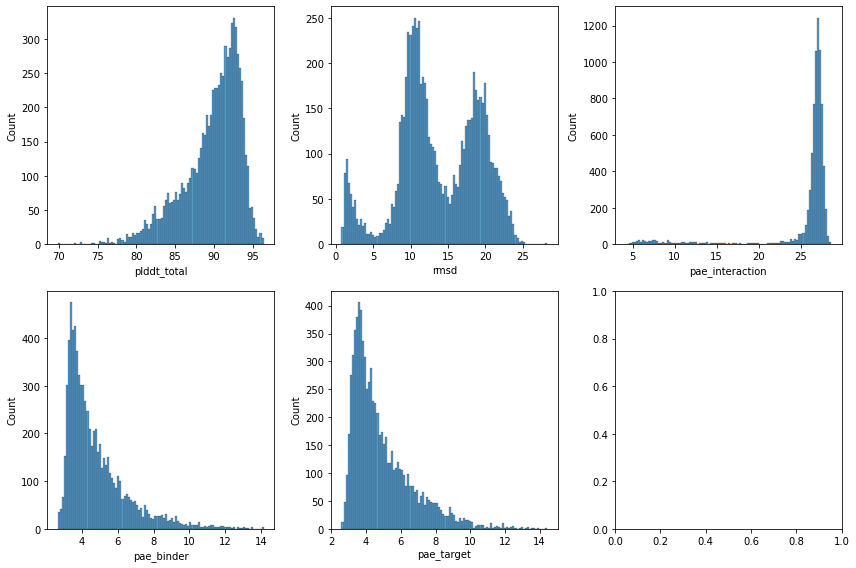

In [3]:
from crispy_shifty.plotting.utils import histplot_df

cols = [
        "plddt_total",
        "rmsd",
        "pae_interaction",
        "pae_binder",
        "pae_target",
    ]

# make sure all the columns to plot are numeric
scores_df[cols] = scores_df[cols].astype(float)
fig, axs = histplot_df(scores_df, cols=cols, bins=100)

# pairplot these as well

In [4]:
def filter_df(df, cutoffs):
    filtered_df = df

    for score_term, cutoff, greaterthan in cutoffs:
        if greaterthan:
            filtered_df = filtered_df[filtered_df[score_term] > cutoff]
        else:
            filtered_df = filtered_df[filtered_df[score_term] < cutoff]

    print(len(filtered_df))
    
    return filtered_df

In [5]:
# Filter designs

cutoffs = [
    ('plddt_total', 85, 1),
    ('rmsd', 3, 0)
]

filtered_df = filter_df(scores_df, cutoffs)
filtered_df

344


,pae_binder,pae_interaction,pae_interaction1,pae_interaction2,pae_target,plddt_binder,plddt_target,plddt_total,rmsd,time
description,,,,,,,,,,
8b353181211b6d9df068681edcf0dd7b64cf74e7bee41111_af2pred,5.731,6.772,7.110,6.434,4.284,88.102,90.264,89.183,1.941,44.229
b97d60f91aa2cd26e415dbbe2bff2426d13c765a335b4977_af2pred,4.541,5.519,5.709,5.329,3.650,90.726,92.211,91.468,1.248,44.239
d2127da431567403446cf34562830c33248ae7339cf5b24e_af2pred,6.371,7.958,8.123,7.794,3.902,89.308,90.761,90.034,2.829,44.417
d0dc64f8fbd8c636628088cf18b26baa203f6c8018bb5264_af2pred,4.451,5.409,5.537,5.281,3.546,92.115,93.037,92.576,0.960,58.698
ea0991f15deecffd018a3abc50b0c34c78a8934fe362f457_af2pred,8.819,11.026,11.405,10.648,4.607,88.211,90.465,89.338,2.620,58.799
...,...,...,...,...,...,...,...,...,...,...
b8a2d4f5bc64c47c15d98ca4bc0af64d43f1f3559f981485_af2pred,5.030,6.311,6.508,6.115,3.774,90.455,91.907,91.181,1.070,61.503
42ebadcaf192014a2fd8d4157d875f3a153beafe872380e7_af2pred,6.407,7.418,7.586,7.250,3.265,92.102,94.016,93.059,1.585,61.533
7e8f59343690bd905a5583733a4faab8d865d3c9748f2eff_af2pred,4.717,6.194,6.367,6.020,3.659,91.079,91.979,91.529,1.465,61.441


In [6]:
print(f"echo \"{' '.join(filtered_df.index)}\" | silentextractspecific ../af2_predictions.silent")


echo "8b353181211b6d9df068681edcf0dd7b64cf74e7bee41111_af2pred b97d60f91aa2cd26e415dbbe2bff2426d13c765a335b4977_af2pred d2127da431567403446cf34562830c33248ae7339cf5b24e_af2pred d0dc64f8fbd8c636628088cf18b26baa203f6c8018bb5264_af2pred ea0991f15deecffd018a3abc50b0c34c78a8934fe362f457_af2pred d61f738b319799e2f63552e709edf011c92b4f0230668523_af2pred fee0b69fc85f796e0a13521af4497813c93b7d116d188c16_af2pred 1f9a308c853efe25f9e5eee841e5f3d1cf3c25107e39ad6f_af2pred 60dda25a755dbe551252debd200a37eb7daec6a036f7e925_af2pred 071b7989731a161304014f4c74030b0679814d4a8e2ef7f5_af2pred eda95705cb1d95cc3b923932b7366c22ad5be9257876a497_af2pred de091859832d5b8831900c2e67d97d63aaf77da7f5fb32d7_af2pred 434b165a14d5add9b3ff3f9f9118d3d0eb2b80da17517364_af2pred a193eaa25163412d494e4cb0c99d3b50f4105a2afd8bc08f_af2pred 10bb5252c144b068aa9e528018cc9952d5b9fe326c276e48_af2pred 88afdad4be9a987a1a46e5d52a8e91a1f966fc288c7bccb0_af2pred 6fac780f4178227b9849cc38327a5bc1ea3ab65e2cdb7473_af2pred c48a1070af78971c0667015e8

In [7]:
with open('05_two_state/run_4/af2_selected.list', 'r') as f:
    af2_folded = f.read().splitlines()

with open('06_alphafold_two_state/05_run_4_af2/predicted_dimers.list', 'w') as f:
    for tag in sorted(filtered_df.index):
        full_path = list(filter(lambda x: tag[:-8] in x, af2_folded))[0]
        f.write(full_path + '\n')

#### Now look at predictions of MSD designs starting from design models ####


In [8]:
scores_df = pd.read_csv(
    '06_alphafold_two_state/05_run_4_des/af2_complex_prediction_runs_combined.sc',
    sep=' ',
    index_col='description',
    usecols=list(range(1,12)))
scores_df

,pae_binder,pae_interaction,pae_interaction1,pae_interaction2,pae_target,plddt_binder,plddt_target,plddt_total,rmsd,time
description,,,,,,,,,,
52234f479eb2feb072fbad7fe55432f6a16b63c6812ce635_af2pred,3.295,27.504,27.158,27.850,4.206,93.094,90.555,91.824,13.176,249.496
15760be20304d7d4f017064a03b71ca4c0db6c42908e760c_af2pred,3.820,26.629,26.251,27.008,5.385,91.538,88.757,90.148,16.624,41.527
b713e2d452fae19a8e94336454fbc517b4fae1c639fb05fa_af2pred,4.165,25.812,25.964,25.660,3.501,91.470,93.918,92.694,19.941,41.995
3b49526a5830d83c2e8c90f96e0fcd76f5ec2b5117e29af2_af2pred,3.035,27.184,26.976,27.393,3.825,94.540,92.097,93.319,10.893,42.301
d46e91e67d48118bd7c9b01f0948a9d535a414ae5ab48805_af2pred,5.392,27.299,27.202,27.397,6.345,83.905,79.960,81.933,13.924,42.265
...,...,...,...,...,...,...,...,...,...,...
577ec673b44afbdc09d19287fb76142ff5e5833fff1ee812_af2pred,5.770,27.715,27.734,27.696,5.111,86.480,86.760,86.620,22.038,65.253
2ce25f239483b6083ecb8f7fcdf6e917210c884ac0c91473_af2pred,4.545,27.524,27.386,27.662,5.484,88.338,85.321,86.829,20.793,65.106
c01601cf77a65bfbed07e1516c1377fff560f8935fa5271b_af2pred,4.124,25.813,25.559,26.068,5.946,90.127,82.394,86.260,8.617,65.145


5it [00:01,  3.68it/s]


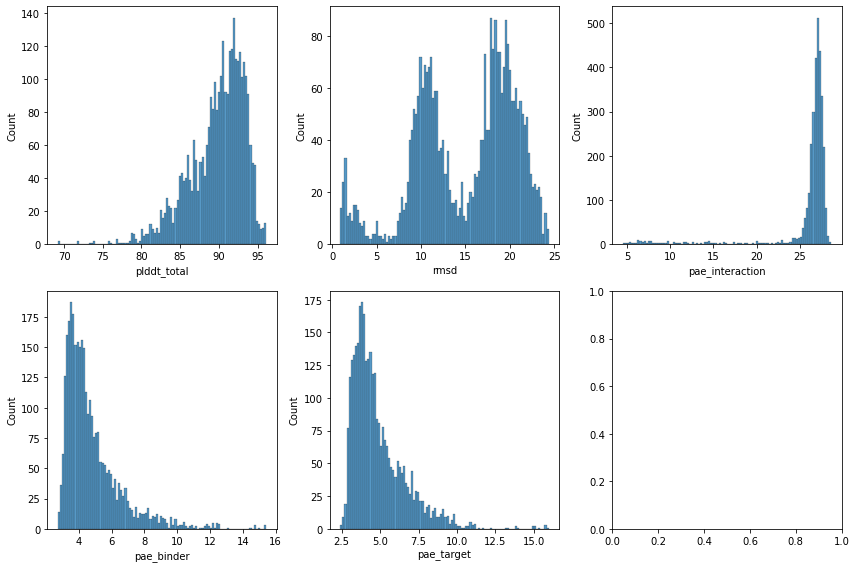

In [9]:
from crispy_shifty.plotting.utils import histplot_df

cols = [
        "plddt_total",
        "rmsd",
        "pae_interaction",
        "pae_binder",
        "pae_target",
    ]

# make sure all the columns to plot are numeric
scores_df[cols] = scores_df[cols].astype(float)
fig, axs = histplot_df(scores_df, cols=cols, bins=100)

# pairplot these as well

In [10]:
# Filter designs

cutoffs = [
    ('plddt_total', 85, 1),
    ('rmsd', 3, 0)
]

filtered_df = filter_df(scores_df, cutoffs)
filtered_df

112


,pae_binder,pae_interaction,pae_interaction1,pae_interaction2,pae_target,plddt_binder,plddt_target,plddt_total,rmsd,time
description,,,,,,,,,,
c2255dbf3777149426191be7c04d561280da2f5c6fe470e1_af2pred,5.467,7.409,7.624,7.195,4.142,88.015,89.506,88.760,2.694,42.462
52f9db0549ffd90add3b215fbce8c9979c18503b1c38d265_af2pred,5.156,9.693,9.707,9.678,5.903,86.033,85.815,85.924,1.556,42.173
0fc6b0c6d55890d5b95ff7fa72ebc8916cb410954a75637c_af2pred,4.844,8.725,8.589,8.861,6.654,88.386,86.887,87.636,2.025,42.318
b92dc97a1cc97e3afdb41c0beb33207a82d4ec67ac704419_af2pred,5.095,7.770,7.964,7.576,4.326,86.011,87.430,86.720,1.409,42.392
02077d45357472dbf23368abecfbdcaa28244e781e354f7d_af2pred,4.858,6.255,6.422,6.088,4.548,86.867,88.403,87.635,1.120,54.712
...,...,...,...,...,...,...,...,...,...,...
f2f7d7aaf8db8e89034af89be1dcaab54baa386ab61c34e3_af2pred,8.005,9.280,9.421,9.139,3.836,90.461,91.753,91.107,2.215,59.912
7f1024af582461ae50d9ef03939ca96ad360f489f697f5fb_af2pred,6.531,8.642,8.585,8.699,4.472,88.324,89.143,88.734,1.953,60.051
fb24df9fe16f2d869dea6ef96f35059fa14f10cbf9e8cd33_af2pred,10.946,12.585,12.694,12.475,4.175,89.332,90.816,90.074,2.667,60.301


In [11]:
print(f"echo \"{' '.join(filtered_df.index)}\" | silentextractspecific ../af2_predictions.silent")


echo "c2255dbf3777149426191be7c04d561280da2f5c6fe470e1_af2pred 52f9db0549ffd90add3b215fbce8c9979c18503b1c38d265_af2pred 0fc6b0c6d55890d5b95ff7fa72ebc8916cb410954a75637c_af2pred b92dc97a1cc97e3afdb41c0beb33207a82d4ec67ac704419_af2pred 02077d45357472dbf23368abecfbdcaa28244e781e354f7d_af2pred 4ca7322a3109534360507492305137612dcb1498df9d9ade_af2pred 76c6832568d0765b6641aaf3e64940c31fcf7e2283cacd4f_af2pred ef95427c186888aee5bcc570c0ba41360f052415c728a479_af2pred 3c13c42e625eadef0455eb063d7aab76b9d7495f2d5fd8d8_af2pred bacdd56ddc7314e2cc3e047b67328842e5abdd59e60e6030_af2pred e1cf2a80e2eebab484f11b711f7b1ffc6cf49a36ac4766b4_af2pred aea512f37da5e44136d12025435cb36871ed21fd4c1bb922_af2pred e6ad3bb336545e816922526431229badd812e19dbf69ebb9_af2pred fccddabe78dd65be2a93cb2f693f66f2c362fa5c4ba14ba4_af2pred 805e1219d50f0d2472670ba67ea0136ac94501d42ebb7317_af2pred 871b677a316e3577bb5c157dbdd9d75870f81bfae1a983bf_af2pred 04eeaf7048fa5a5f6fdae0f2ed1b05195703c0503621632b_af2pred 30caddaeceb4f5c5721750374

In [12]:
with open('05_two_state/run_4/des_selected.list', 'r') as f:
    af2_folded = f.read().splitlines()

with open('06_alphafold_two_state/05_run_4_des/predicted_dimers.list', 'w') as f:
    for tag in sorted(filtered_df.index):
        full_path = list(filter(lambda x: tag[:-8] in x, af2_folded))[0]
        f.write(full_path + '\n')

In [1]:
from more_itertools import ichunked

with open('06_alphafold_two_state/05_run_4_af2/predicted_dimers.list', 'r') as sel_f:
    selected = sel_f.read().splitlines()

with open('05_two_state/run_4/build_monomer_silent.tasks', 'w') as tasks_f:
    for i, lines in enumerate(ichunked(selected, 20)):
        tasks_f.write(f'05_two_state/build_monomer_silent.py 05_two_state/run_4/selected_for_af2/silents/af2_{i}.silent ' + ' '.join(lines) + '\n')

with open('06_alphafold_two_state/05_run_4_des/predicted_dimers.list', 'r') as sel_f:
    selected = sel_f.read().splitlines()

with open('05_two_state/run_4/build_monomer_silent.tasks', 'a') as tasks_f:
    for i, lines in enumerate(ichunked(selected, 20)):
        tasks_f.write(f'05_two_state/build_monomer_silent.py 05_two_state/run_4/selected_for_af2/silents/des_{i}.silent ' + ' '.join(lines) + '\n')

In [15]:
print("sbatch -a 1-$(cat 05_two_state/run_4/build_monomer_silent.tasks | wc -l) 05_two_state/run_4/build_monomer_silent.sh")
print('cat 05_two_state/run_4/selected_for_af2/silents/*.silent > 05_two_state/run_4/selected_for_af2/dimer-predicted_monomers.silent')

sbatch -a 1-$(cat 05_two_state/run_4/build_monomer_silent.tasks | wc -l) 05_two_state/run_4/build_monomer_silent.sh
cat 05_two_state/run_4/selected_for_af2/silents/*.silent > 05_two_state/run_4/selected_for_af2/monomers.silent


In [2]:
scores_df = pd.read_csv(
    '06_alphafold_two_state/05_run_4_monomers/predict_monomers_runs_combined.sc',
    sep=' ',
    index_col='description',
    usecols=list(range(1,5)))
scores_df

,plddt,rmsd,time
description,,,
0013b04e2a3c42542d640dabc8abc736bd51d83348793b7b_A_af2pred,88.209,2.408,230.796
0013b04e2a3c42542d640dabc8abc736bd51d83348793b7b_B_af2pred,90.315,0.900,14.624
00177cb351ca42ca18fb09571dec90f6a18ee1fb918fc0ce_A_af2pred,94.016,0.976,14.671
00177cb351ca42ca18fb09571dec90f6a18ee1fb918fc0ce_B_af2pred,93.172,5.913,14.615
025c7ac70fd68a5083c055dede20fb4939dcb358c4505744_A_af2pred,93.809,1.308,14.549
...,...,...,...
6e55be918a943f0dbe2896407b7e0af37cb8b429204f5275_B_af2pred,90.926,1.126,10.894
b1184c2e678848df6676452546e53ee710822a0ed155dea2_A_af2pred,86.097,5.773,10.803
b1184c2e678848df6676452546e53ee710822a0ed155dea2_B_af2pred,91.114,1.027,10.982


2it [00:00, 11.61it/s]


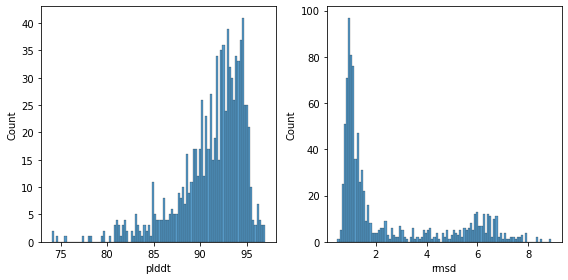

In [3]:
from crispy_shifty.plotting.utils import histplot_df

cols = [
        "plddt",
        "rmsd"
    ]

# make sure all the columns to plot are numeric
scores_df[cols] = scores_df[cols].astype(float)
fig, axs = histplot_df(scores_df, cols=cols, bins=100)

# pairplot these as well

In [4]:
def filter_df(df, cutoffs):
    filtered_df = df

    for score_term, cutoff, greaterthan in cutoffs:
        if greaterthan:
            filtered_df = filtered_df[filtered_df[score_term] > cutoff]
        else:
            filtered_df = filtered_df[filtered_df[score_term] < cutoff]

    print(len(filtered_df))
    
    return filtered_df

def remove_singlets(df):
    only_pairs_df = df
    for index in df.index:
        if '_A_' in index:
            if index.replace('_A_', '_B_', 1) not in df.index:
                only_pairs_df = only_pairs_df.drop(index)
        elif '_B_' in index:
            if index.replace('_B_', '_A_', 1) not in df.index:
                only_pairs_df = only_pairs_df.drop(index)

    print(len(only_pairs_df))

    return only_pairs_df

In [5]:
# Filter designs

cutoffs = [
    ('plddt', 85, 1),
    ('rmsd', 3, 0)
]

filtered_df = filter_df(scores_df, cutoffs)
filtered_df = remove_singlets(filtered_df)
filtered_df

634
446


,plddt,rmsd,time
description,,,
0013b04e2a3c42542d640dabc8abc736bd51d83348793b7b_A_af2pred,88.209,2.408,230.796
0013b04e2a3c42542d640dabc8abc736bd51d83348793b7b_B_af2pred,90.315,0.900,14.624
03358187e8fa73da5d1acf794a26465fdd13b96992a35d34_A_af2pred,88.035,2.038,226.778
03358187e8fa73da5d1acf794a26465fdd13b96992a35d34_B_af2pred,95.469,0.668,13.698
0d463535dfa15168ef6ce257dca41b5692972d31b5c1f816_A_af2pred,93.696,1.202,14.045
...,...,...,...
ec30d34aa580169b6c6a785c6b1bf34fd625bea1086a2230_B_af2pred,96.279,0.829,14.202
f2f7d7aaf8db8e89034af89be1dcaab54baa386ab61c34e3_A_af2pred,94.658,1.471,14.183
f2f7d7aaf8db8e89034af89be1dcaab54baa386ab61c34e3_B_af2pred,89.748,2.063,14.206


In [6]:
print(f"echo \"{' '.join(filtered_df.index)}\" | silentextractspecific ../af2_predictions.silent")

echo "0013b04e2a3c42542d640dabc8abc736bd51d83348793b7b_A_af2pred 0013b04e2a3c42542d640dabc8abc736bd51d83348793b7b_B_af2pred 03358187e8fa73da5d1acf794a26465fdd13b96992a35d34_A_af2pred 03358187e8fa73da5d1acf794a26465fdd13b96992a35d34_B_af2pred 0d463535dfa15168ef6ce257dca41b5692972d31b5c1f816_A_af2pred 0d463535dfa15168ef6ce257dca41b5692972d31b5c1f816_B_af2pred 976cbbd7d4d586102e81b8bed485a5a95470565a51682436_A_af2pred 976cbbd7d4d586102e81b8bed485a5a95470565a51682436_B_af2pred 980b7c0414f796bc2cad6a085774d42fde02a1be2834d3a7_A_af2pred 980b7c0414f796bc2cad6a085774d42fde02a1be2834d3a7_B_af2pred 995e656b2afaa229ec08e3d1cdf30bb4b26aefbbdb128040_A_af2pred 995e656b2afaa229ec08e3d1cdf30bb4b26aefbbdb128040_B_af2pred 999a11dc4e77c6a483ce33ccd33d2736b8e070fe6273a765_A_af2pred 999a11dc4e77c6a483ce33ccd33d2736b8e070fe6273a765_B_af2pred 9c07a50596da36d286fc25c420084a12e3b4289aa9993606_A_af2pred 9c07a50596da36d286fc25c420084a12e3b4289aa9993606_B_af2pred 9fe5f28714051882ae4309c70a8ddeb00d96092e1844cc4e_A

### Copy and add scores to the designs which are predicted to dimerize when together and are predicted to fold correctly as monomers ###

In [6]:
# # Load design scores dataframe

frames = [pd.read_json('05_two_state/run_4/af2_scores.json'),
          pd.read_json('05_two_state/run_4/design_scores.json')]

des_scores_df = pd.concat(frames)

des_scores_df.loc[:, 'msd_input_model'] = np.where(des_scores_df.index.str.contains('af2_decoys'), 'af2', 'rosetta')
des_scores_df.loc[:, 'int_upweight'] = 3.0*np.ones(len(des_scores_df.index))

# save the paths to the Rosetta multistate design files, but change the dataframe indexing to only contain the uuid for matching with other dataframes later
des_scores_df['design_path'] = des_scores_df.index
des_scores_df.rename(index=lambda i: i.split('/')[-1].split('.')[0], inplace=True)

des_scores_df

,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,...,vbuns_Y,wnm_all_A_X,wnm_all_A_Y,wnm_all_B_X,wnm_all_B_Y,wnm_hlx_X,wnm_hlx_Y,msd_input_model,int_upweight,design_path
ebd05b9317bd3702fff9ce331f8c90a59a03001435214a67,XAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAAGBAAA...,XAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAAGBAAA...,222.469345,44.109371,44.109371,loop_remodel,loop_remodel,-1.000000,340.364197,559.456909,...,2,0.273968,0.801046,0.322196,0.421473,0.097108,0.144357,af2,3.0,05_two_state/run_4/af2_decoys/ebd05b9317bd3702...
f341e415f164086e8f47dc021c364d83be46ad6c7cb54b82,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,124.985054,61.185627,61.185627,loop_match,loop_match,-1.000000,412.533051,601.542358,...,3,0.269729,0.477070,0.231012,0.442705,0.106552,0.122451,af2,3.0,05_two_state/run_4/af2_decoys/f341e415f164086e...
d22f5909838ce16ec2336e68bd0107180fa1c31110aa9996,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,124.986877,61.185627,61.185627,loop_match,loop_match,-1.000000,562.327698,741.352112,...,3,0.230951,0.949901,0.312372,0.435266,0.122512,0.183364,af2,3.0,05_two_state/run_4/af2_decoys/d22f5909838ce16e...
d4d28ad2e4c59570f7cceb0d738bbbb02128427763c301e0,XAAAAAAAAAAAAAAAAAAAAAAABAABAAAAAAAAAAAAAAAAAA...,XAAAAAAAAAAAAAAAAAAAAAAABAABAAAAAAAAAAAAAAAAAA...,489.982300,58.995354,58.995125,loop_match,loop_remodel,-1.000000,655.691650,991.115112,...,4,0.345356,1.281243,0.332068,0.801602,0.111256,0.204896,af2,3.0,05_two_state/run_4/af2_decoys/d4d28ad2e4c59570...
98ddb7b6e28dccac5f21b267a695f886ae6000b3c48074c6,XBAAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAA...,XBAAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAA...,747.533386,74.775955,74.775955,loop_match,loop_match,-1.000000,534.091064,704.185669,...,3,0.372503,0.723214,0.340746,0.894870,0.105323,0.267853,af2,3.0,05_two_state/run_4/af2_decoys/98ddb7b6e28dccac...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f633b7b4a6011b5b4d1a518e391ececd3a5923ee4730dcec,XBAAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAA...,XBAAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAA...,951.809143,74.775955,74.775955,loop_match,loop_match,-1.000000,498.185333,828.041138,...,2,0.346171,0.621232,0.362860,1.060351,0.134899,0.126395,rosetta,3.0,05_two_state/run_4/design_decoys/f633b7b4a6011...
bc548d1301becb2cb81c5e962fcc00332ba7159294a893aa,XAAAAAAAAAAAAAAAAAABAABAAAAAAAAAAAAAAAAAAABAAB...,XAAAAAAAAAAAAAAAAAABAABAAAAAAAAAAAAAAAAAAABAAB...,105.116508,51.600029,51.600029,loop_match,loop_match,-1.000000,526.736267,678.195801,...,1,0.370927,0.895443,0.282535,1.079398,0.092409,0.158851,rosetta,3.0,05_two_state/run_4/design_decoys/bc548d1301bec...
cff3fd88e549985aab0cf3d139c9cb636e223be87de3f3bd,XBAAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAA...,XBAAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAA...,747.694946,74.775955,74.775955,loop_match,loop_match,-1.000000,508.725494,659.838989,...,2,0.309955,5.000000,0.416006,1.639579,0.132041,0.130152,rosetta,3.0,05_two_state/run_4/design_decoys/cff3fd88e5499...
4a24e2f0e41fdfe566e0b3bca9fcf06c15b01b9e47a3776f,XAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAA...,XAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAA...,461.588531,58.330166,403.257355,loop_remodel,loop_remodel,0.000016,685.046814,840.829773,...,6,0.347207,0.610786,0.337765,0.454498,0.174189,0.178457,rosetta,3.0,05_two_state/run_4/design_decoys/4a24e2f0e41fd...


In [7]:
# Load dimer prediction dataframe

dimer_pred_files = ['06_alphafold_two_state/05_run_4_af2/af2_complex_prediction_runs_combined.sc',
                    '06_alphafold_two_state/05_run_4_des/af2_complex_prediction_runs_combined.sc']

frames = []
for dimer_pred_file in dimer_pred_files:
    frames.append(
        pd.read_csv(
            dimer_pred_file,
            sep=' ',
            index_col='description',
            usecols=list(range(1,12))
        )
    )
dimer_pred_scores_df = pd.concat(frames)

# Rename/delete some columns to include only those to add to the pdbs later, and rename the index to contain only the uuid for matching with other dataframes later
dimer_pred_scores_df.drop(columns='time', inplace=True)
dimer_pred_scores_df.rename(columns={'plddt_total': 'plddt_dimer', 'rmsd': 'rmsd_dimer', 'pae_binder': 'pae_A', 'pae_target': 'pae_B', 'plddt_binder': 'plddt_dimer_A', 'plddt_target': 'plddt_dimer_B'}, index=lambda i: i.split('_')[0], inplace=True)

dimer_pred_scores_df

,pae_A,pae_interaction,pae_interaction1,pae_interaction2,pae_B,plddt_dimer_A,plddt_dimer_B,plddt_dimer,rmsd_dimer
description,,,,,,,,,
1a2dcdc9a50fa83cc2fe3daa0e171c14c2c81dcac5b01740,6.589,26.916,27.015,26.816,5.425,86.578,87.918,87.248,8.142
7b3d2684a45d76a27b3f909fba9e837b688bd881314eadd9,4.377,26.954,26.959,26.950,4.386,90.246,90.290,90.268,23.019
6ce67e338170c0381de0e3fc42475af88fc67d4c6edb61eb,3.486,27.125,26.823,27.428,6.304,93.780,86.434,90.107,20.888
5fa884bf3a0a2be97ce3a6cb16bab5f5374505f5ec7a379c,3.046,26.904,26.206,27.602,9.381,95.477,84.102,89.790,19.564
3776835b977265259dcf253ca4f583e2bcdfb55801d676d2,3.363,27.081,26.888,27.273,3.908,93.937,91.948,92.942,10.985
...,...,...,...,...,...,...,...,...,...
577ec673b44afbdc09d19287fb76142ff5e5833fff1ee812,5.770,27.715,27.734,27.696,5.111,86.480,86.760,86.620,22.038
2ce25f239483b6083ecb8f7fcdf6e917210c884ac0c91473,4.545,27.524,27.386,27.662,5.484,88.338,85.321,86.829,20.793
c01601cf77a65bfbed07e1516c1377fff560f8935fa5271b,4.124,25.813,25.559,26.068,5.946,90.127,82.394,86.260,8.617


In [8]:
monomer_pred_scores_df = pd.DataFrame()

for index, row in filtered_df.iterrows():
    if '_A_' in index:
        monomer_str = '_A'
    elif '_B_' in index:
        monomer_str = '_B'
    
    des_uuid = index.split('_')[0]
    monomer_pred_scores_df.loc[des_uuid, 'plddt' + monomer_str] = row['plddt']
    monomer_pred_scores_df.loc[des_uuid, 'rmsd' + monomer_str] = row['rmsd']

monomer_pred_scores_df

,plddt_A,rmsd_A,plddt_B,rmsd_B
0013b04e2a3c42542d640dabc8abc736bd51d83348793b7b,88.209,2.408,90.315,0.900
03358187e8fa73da5d1acf794a26465fdd13b96992a35d34,88.035,2.038,95.469,0.668
0d463535dfa15168ef6ce257dca41b5692972d31b5c1f816,93.696,1.202,94.970,0.759
976cbbd7d4d586102e81b8bed485a5a95470565a51682436,94.922,0.867,94.547,0.900
980b7c0414f796bc2cad6a085774d42fde02a1be2834d3a7,90.722,1.339,95.470,0.668
...,...,...,...,...
dce6636ec0f9519951272919f0acccccc26ffbf5ec8de877,94.307,0.828,94.925,0.790
dd41bb7698b5e46b032442503000a1e66f3cdb529bfe2e18,95.190,0.648,92.933,1.340
ec30d34aa580169b6c6a785c6b1bf34fd625bea1086a2230,87.040,2.138,96.279,0.829
f2f7d7aaf8db8e89034af89be1dcaab54baa386ab61c34e3,94.658,1.471,89.748,2.063


In [9]:
# Now add the scores from the dimer predictions and the multistate design

frames = [monomer_pred_scores_df,
          dimer_pred_scores_df.loc[monomer_pred_scores_df.index],
          des_scores_df.loc[monomer_pred_scores_df.index]]

full_scores_df = pd.concat(frames, axis=1)
from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
):
    display(full_scores_df)

,plddt_A,rmsd_A,plddt_B,rmsd_B,pae_A,pae_interaction,pae_interaction1,pae_interaction2,pae_B,plddt_dimer_A,plddt_dimer_B,plddt_dimer,rmsd_dimer,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dssp_A,dssp_B,fa_dun,fa_intra_rep,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,model,new_loop_resis,new_loop_resis_A,new_loop_resis_B,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,remodel_after_loop_A,remodel_after_loop_B,remodel_before_loop_A,remodel_before_loop_B,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,shift_A,shift_B,ss_sc,type,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity,ala_penalty,buns_X,buns_Y,cms_Y,ddg_Y,dslf_fa13,dslf_fa13_X,dslf_fa13_Y,exposed_hydrophobics_X,exposed_hydrophobics_Y,fa_atr,fa_atr_X,fa_atr_Y,fa_dun_dev,fa_dun_dev_X,fa_dun_dev_Y,fa_dun_rot,fa_dun_rot_X,fa_dun_rot_Y,fa_dun_semi,fa_dun_semi_X,fa_dun_semi_Y,fa_elec,fa_elec_X,fa_elec_Y,fa_intra_atr_xover4,fa_intra_atr_xover4_X,fa_intra_atr_xover4_Y,fa_intra_elec,fa_intra_elec_X,fa_intra_elec_Y,fa_intra_rep_xover4,fa_intra_rep_xover4_X,fa_intra_rep_xover4_Y,fa_intra_sol_xover4,fa_intra_sol_xover4_X,fa_intra_sol_xover4_Y,fa_rep,fa_rep_X,fa_rep_Y,fa_sol,fa_sol_X,fa_sol_Y,geometry_X,geometry_Y,geometry_loop_X,geometry_loop_Y,hbond_bb_sc,hbond_bb_sc_X,hbond_bb_sc_Y,hbond_lr_bb,hbond_lr_bb_X,hbond_lr_bb_Y,hbond_sc,hbond_sc_X,hbond_sc_Y,hbond_sr_bb,hbond_sr_bb_X,hbond_sr_bb_Y,hxl_tors,hxl_tors_X,hxl_tors_Y,ibuns_Y,lk_ball,lk_ball_X,lk_ball_Y,lk_ball_bridge,lk_ball_bridge_X,lk_ball_bridge_Y,lk_ball_bridge_uncpl,lk_ball_bridge_uncpl_X,lk_ball_bridge_uncpl_Y,lk_ball_iso,lk_ball_iso_X,lk_ball_iso_Y,mean_pae,mean_pae_interaction,mean_pae_interaction_AB,mean_pae_interaction_BA,mean_pae_intra_chain,mean_pae_intra_chain_A,mean_pae_intra_chain_B,mean_plddt,met_penalty,mismatch_probability_X,mismatch_probability_Y,np_penalty,omega,omega_X,omega_Y,pTMscore,p_aa_pp,p_aa_pp_X,p_aa_pp_Y,pro_close,pro_close_X,pro_close_Y,rama_prepro,rama_prepro_X,rama_prepro_Y,recycles,ref,ref_X,ref_Y,rmsd_to_input,sap_A_X,sap_A_Y,sap_B_X,sap_B_Y,sap_X,sap_Y,sasa_Y,sbuns_X,sbuns_Y,sc_X,sc_Y,sc_int_Y,score_per_res_X,score_per_res_Y,tol,total_length_A,total_length_B,total_score,total_score_A_X,total_score_A_Y,total_score_B_X,total_score_B_Y,total_score_X,total_score_Y,vbuns_X,vbuns_Y,wnm_all_A_X,wnm_all_A_Y,wnm_all_B_X,wnm_all_B_Y,wnm_hlx_X,wnm_hlx_Y,msd_input_model,int_upweight,design_path
0013b04e2a3c42542d640dabc8abc736bd51d83348793b7b,88.209,2.408,90.315,0.900,4.049,5.126,5.147,5.105,3.706,93.024,92.548,92.786,1.049,XAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAA...,XAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAA...,765.854004,54.325855,54.604378,loop_remodel,loop_match,-1.0,350.579895,567.640381,809.493042,21,55,17,LHHHHHHHHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHH...,LHHHHHHHHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHH...,813.907307,807.916933,19.24112,8.094554,7.104069,0.752276,0.773637,3.0,"101,102,305,306","101,102","101,102",X26_3_20_2_ct1_fe,204,8.910085,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4,5,4,1.0,NaN,2.0,NaN,-1.0,0.767119,0.764927,0.739339,-1322.999268,-229.890884,-927.363098,-953.171814,-557.535583,-272.514832,-532.284180,-259.769348,-234.514954,-3.274751,-1,1,0.704857,monomer_ptm,0.197988,0.183607,0.176035,0.184699,1.002799,0.870116,0.098350,0.0,2,3,5,1010.200684,-132.220810,0,0,0,628.242249,212.664902,-5050.233330,-2496.155029,-2554.078125,118.780374,50.643822,68.136551,606.979078,304.495270,302.483826,1077.313822,537.846069,539.467773,-2210.967422,-1112.803833,-1098.163574,-272.700849,-142.478836,-130.222015,-209.333390,-103.984459,-105.348930,206.713779,110.059601,96.654175,239.235819,127.369598,111.866226,996.209563,472.632538,523.577026,4414.225663,2206.324463,2207.901123,0,0,0,0,-47.493690,-21.496803,-25.9968

In [10]:
full_scores_df['Y-X'] = full_scores_df['total_score_Y'] - full_scores_df['total_score_X']
full_scores_df['A_Y-X'] = full_scores_df['total_score_A_Y'] - full_scores_df['total_score_A_X']
full_scores_df['B_Y-X'] = full_scores_df['total_score_B_Y'] - full_scores_df['total_score_B_X']

43it [00:01, 28.43it/s]


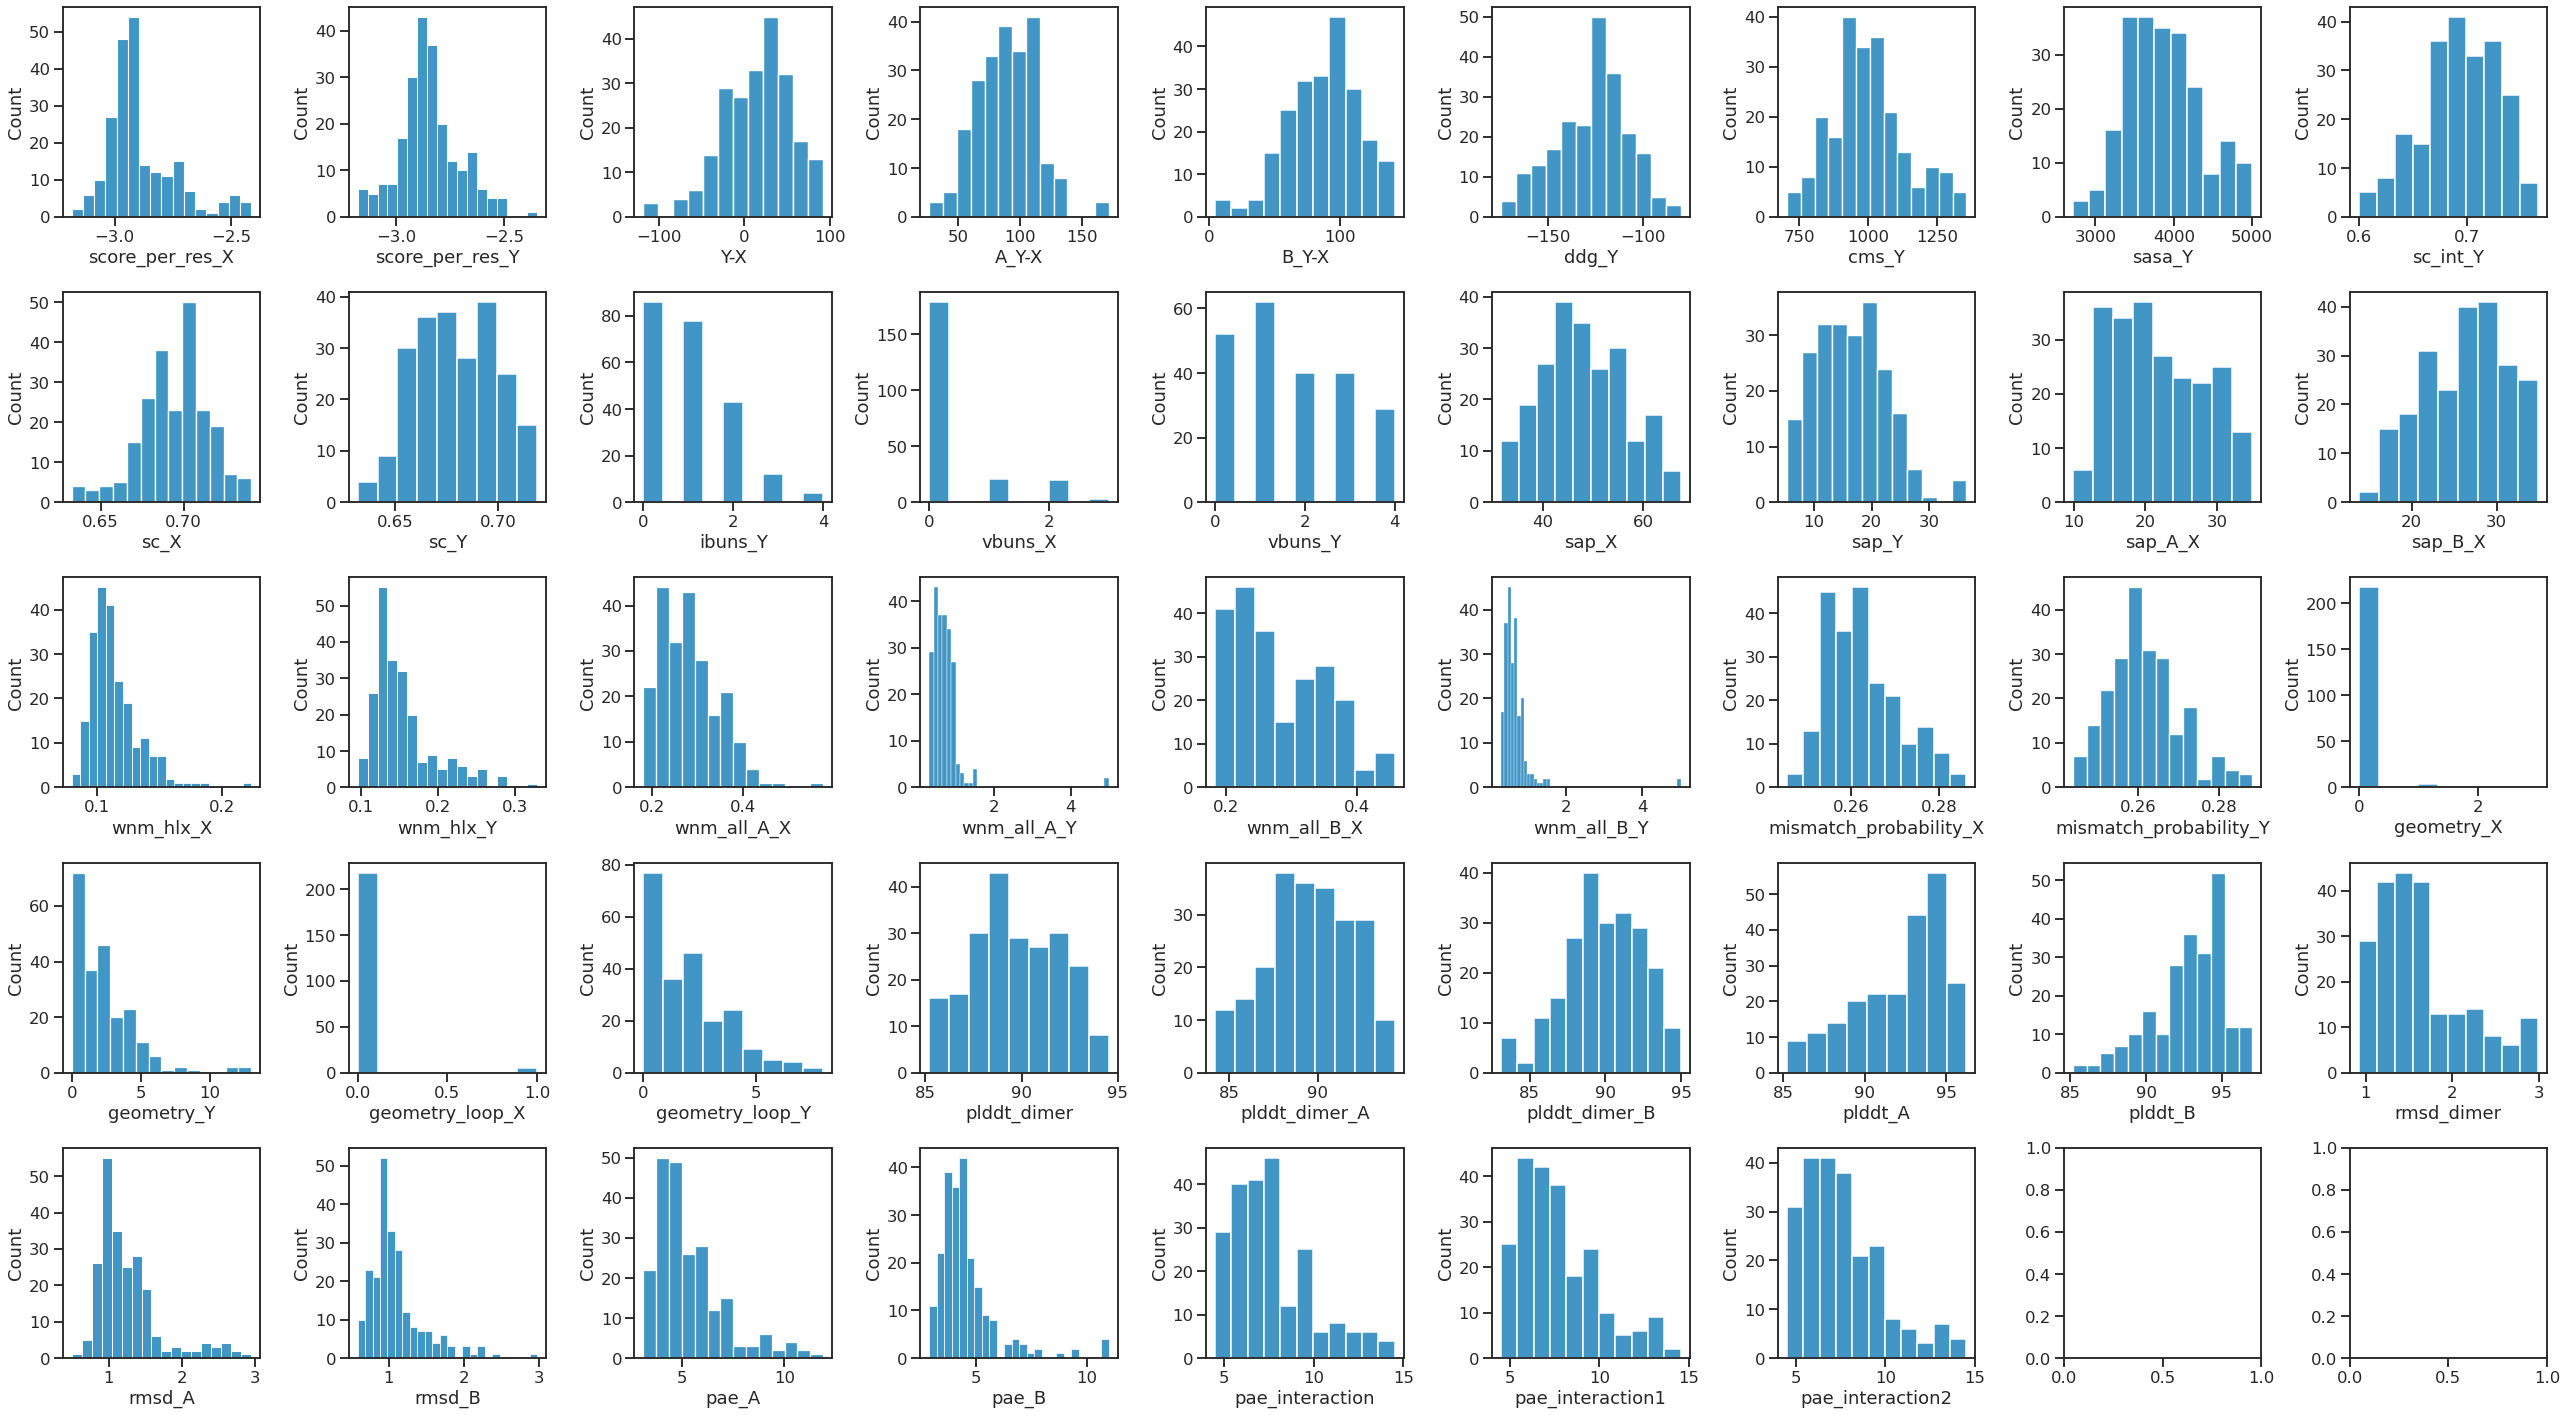

In [11]:
from crispy_shifty.plotting.utils import histplot_df

sns.set(
    context="talk",
    font_scale=1,  # make the font larger; default is pretty small
    style="ticks",  # make the background white with black lines
    palette="colorblind",  # a color palette that is colorblind friendly!
)

cols = [
        "score_per_res_X",
        "score_per_res_Y",
        "Y-X",
        "A_Y-X",
        "B_Y-X",
        "ddg_Y",
        "cms_Y",
        "sasa_Y",
        "sc_int_Y",
        "sc_X",
        "sc_Y",
        "ibuns_Y",
        "vbuns_X",
        "vbuns_Y",
        "sap_X",
        "sap_Y",
        "sap_A_X",
        "sap_B_X",
        "wnm_hlx_X",
        "wnm_hlx_Y",
        "wnm_all_A_X",
        "wnm_all_A_Y",
        "wnm_all_B_X",
        "wnm_all_B_Y",
        "mismatch_probability_X",
        "mismatch_probability_Y",
        "geometry_X",
        "geometry_Y",
        "geometry_loop_X",
        "geometry_loop_Y",
        'plddt_dimer',
        'plddt_dimer_A',
        'plddt_dimer_B',
        'plddt_A',
        'plddt_B',
        'rmsd_dimer',
        'rmsd_A',
        'rmsd_B',
        'pae_A',
        'pae_B',
        'pae_interaction',
        'pae_interaction1',
        'pae_interaction2',
    #     "parent",
    ]

# make sure all the columns to plot are numeric
full_scores_df[cols] = full_scores_df[cols].astype(float)
fig, axs = histplot_df(full_scores_df, cols=cols, save_path='06_alphafold_two_state/predicted_designs_4/predicted_dimer_metrics.png')

# pairplot these as well

In [11]:
full_scores_df.to_json('06_alphafold_two_state/predicted_designs_4/full_scores_df.json')

In [12]:
# Use bb_clash to match design models to their parent one-state design

import pyrosetta.distributed.cluster as cluster

bb_clash_list = []
with open('04_alphafold_one_state/selected.list', 'r') as f:
    for design_path in f:
        design_path = design_path.rstrip()
        bb_clash = float(cluster.get_scores_dict(design_path)["scores"]['bb_clash'])
        bb_clash_list.append((design_path, bb_clash, 'af2'))
with open('04_alphafold_one_state/selected_design.list', 'r') as f:
    for design_path in f:
        design_path = design_path.rstrip()
        bb_clash = float(cluster.get_scores_dict(design_path)["scores"]['bb_clash'])
        bb_clash_list.append((design_path, bb_clash, 'des'))

def get_pdb_path(bb_clash, model_str, bb_clash_list):
    for pdb_path, bb_clash_val, model_str_val in bb_clash_list:
        if abs(bb_clash_val - bb_clash) < 0.001 and model_str_val == model_str:
            return pdb_path
    print('No match found for bb_clash:', bb_clash, 'model_str:', model_str)

/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


In [14]:
# Copy selected designs and write PyRosettaCluster-like metadata

import collections
import json
import os

for index, row in full_scores_df.iterrows():

    scores = row.to_dict()

    design_path = row.pop('design_path')
    split_design_path = design_path.split('/')
    run_str = split_design_path[1]
    decoy_dir = split_design_path[2]
    if scores['msd_input_model'] == 'af2':
        model_str = 'af2'
    else:
        model_str = 'des'

    # Copy the design models with metadata

    pdb_path = get_pdb_path(scores['bb_clash'], model_str, bb_clash_list)

    pdbfile_data = json.dumps(
        {
            "instance": {"compressed": False,
                         "decoy_dir_name": decoy_dir,
                         "environment": "",
                         "output_path": "05_two_state/" + run_str,
                         "simulation_name": "05_two_state_" + run_str,
                         "simulation_records_in_scorefile": False,
                         "tasks": {"pdb_path": pdb_path,
                                   "ala_pen": 2,
                                   "met_pen": 1,
                                   "np_pen": 3},
                        },
            "metadata": {"decoy_name": index, "output_file": design_path},
            "scores": collections.OrderedDict(sorted(scores.items())),
        }
    )

    with open(design_path, 'r') as f:
        pdbstring = f.read()

    # Write full .pdb record
    pdbstring_data = pdbstring + os.linesep + "REMARK PyRosettaCluster: " + pdbfile_data
    output_file = '/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/predicted_designs_4/design_models/'  + row['parent'] + '_' + index + '.pdb'
    with open(output_file, "w") as f:
        f.write(pdbstring_data)

    # Copy the AF2 models with metadata

    output_dir = '/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/predicted_designs_4'

    af_dimer_pdb_path = '06_alphafold_two_state/05_' + run_str + '_' + model_str + '/predicted_dimers/' + index + '_af2pred.pdb'
    af_monomer_a_pdb_path = '06_alphafold_two_state/05_run_4_monomers/predicted_dimers_and_monomers/' + index + '_A_af2pred.pdb'
    af_monomer_b_pdb_path = '06_alphafold_two_state/05_run_4_monomers/predicted_dimers_and_monomers/' + index + '_B_af2pred.pdb'

    for combo, path in zip(['dimer', 'monomer_A', 'monomer_B'], [af_dimer_pdb_path, af_monomer_a_pdb_path, af_monomer_b_pdb_path]):

        output_file = output_dir + '/af2_models/' + row['parent'] + '_' + index + '_' + combo + '.pdb'

        pdbfile_data = json.dumps(
            {
                "instance": {"compressed": False,
                            "decoy_dir_name": "af2_models",
                            "environment": "",
                            "output_path": output_dir,
                            "simulation_name": "06_alphafold_two_state",
                            "simulation_records_in_scorefile": False,
                            "tasks": {"pdb_path": design_path,
                                    "af_dimer_pdb_path": af_dimer_pdb_path,
                                    "af_monomer_A_pdb_path": af_monomer_a_pdb_path,
                                    "af_monomer_B_pdb_path": af_monomer_b_pdb_path},
                            },
                "metadata": {"decoy_name": index, "output_file": output_file},
                "scores": collections.OrderedDict(sorted(scores.items())),
            }
        )

        with open(path, 'r') as f:
            pdbstring = f.read()

        # Write full .pdb record
        pdbstring_data = pdbstring + os.linesep + "REMARK PyRosettaCluster: " + pdbfile_data
        with open(output_file, "w") as f:
            f.write(pdbstring_data)

    # Write the score file
        
    scorefile_data = json.dumps(
        {
            output_file: collections.OrderedDict(
                sorted(scores.items())
            ),
        }
    )
    # Write data to new scorefile
    with open('/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/predicted_designs_4/scores.json', "a") as f:
        f.write(scorefile_data + '\n')

In [15]:
# Are most of these coming from the same or a few inputs to two-state design? Or does it widely sample the input set?
# Answer: Yes, the same inputs are usually represented multiple times. When ordering, choose designs from all different inputs.

for index, row in full_scores_df.iterrows():

    scores = row.to_dict()

    if scores['msd_input_model'] == 'af2':
        model_str = 'af2'
    else:
        model_str = 'des'

    pdb_path = get_pdb_path(scores['bb_clash'], model_str, bb_clash_list)

    print('/'.join(pdb_path.split('/')[7:]))

04_alphafold_one_state/decoys/0001/04_alphafold_one_state_5881b1d5f12d42d089a20a77c3799d41.pdb.bz2
04_alphafold_one_state/decoys/0001/04_alphafold_one_state_5881b1d5f12d42d089a20a77c3799d41.pdb.bz2
04_alphafold_one_state/decoys/0001/04_alphafold_one_state_5881b1d5f12d42d089a20a77c3799d41.pdb.bz2
04_alphafold_one_state/decoys/0001/04_alphafold_one_state_5881b1d5f12d42d089a20a77c3799d41.pdb.bz2
04_alphafold_one_state/decoys/0001/04_alphafold_one_state_5881b1d5f12d42d089a20a77c3799d41.pdb.bz2
04_alphafold_one_state/decoys/0000/04_alphafold_one_state_bc3237d8c36a4c19909c90e70b122ccd.pdb.bz2
04_alphafold_one_state/decoys/0001/04_alphafold_one_state_63e6c0cb6c8d4658bac654335568b3eb.pdb.bz2
04_alphafold_one_state/decoys/0000/04_alphafold_one_state_4041a6de91ad489fbb39c8fe3f148fbd.pdb.bz2
04_alphafold_one_state/decoys/0000/04_alphafold_one_state_bc3237d8c36a4c19909c90e70b122ccd.pdb.bz2
04_alphafold_one_state/decoys/0000/04_alphafold_one_state_bc3237d8c36a4c19909c90e70b122ccd.pdb.bz2
04_alphafo

In [ ]:
# Got 223 designs from sampling all inputs, nstruct 15, PPI upweighter
# Got 21 designs from sampling all inputs, nstruct 5, no PPI upweighter
# Wow! This is a much higher success rate- 3.5x higher per nstruct.